<h3 style="color:#C0C0C0;text-align:center;font-size: smaller;">Applied Machine Learning and Data Mining - U26538</h3>

<br>
<h1 style="color:#800080;text-align:center;"> Practical Worksheet (14)</h1>
<h2 style="color:#800080;text-align:center;">Dealing with Class Imbalance</h2>

<h3 b> Introduction </h3>

In the following practical worksheet, you will learn how to use different methods to handle class imbalance.. If you have any questions please ask for assistance during the session and you can also email me if you have any further questions <u> alaa.mohasseb@port.ac.uk</u>. 

<u>Dataset</u>

From moodle/ datasets, download the Social Network Ads and upload it to your Jupyter directory. The dataset has five attributes which are; User ID, Gender, Age, Estimated Salary and Purchased and 400 instances. 

<u>Import the Libraries</u>

In a new Jupyter Notebook (practWeek14), load the NumPy, pandas and matplotlib libraries:

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#this will make your plot outputs appear and be stored within the notebook
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

<b>**If you get an error importing <u>imblearn**</u> download the library using <u>!pip install imblearn</u></b>

<u>Read External Data</u> (Social Network Ads Dataset)
<ul>
<li>Download the dataset from your moodle page.</li>
<li>Upload the dataset to your Jupyter dashboard.</li>
<li>To read an external data (csv file) use the following command:</li>
</ul>

In [44]:
SNA = pd.read_csv("Social_Network_Ads imbalanced.csv")

In [45]:
SNA.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<u>Data understanding and Exploration</u>

To understand the dataset, analysis should be done and some information needs to be explored such as:

- The Attributes
- Data Shape
- Data Description
- Data Information
- Data Type

In [46]:
SNA.keys() #Print the attributes

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [47]:
SNA.describe() #Data description

,User ID,Age,EstimatedSalary,Purchased
count,3.370000e+02,337.000000,337.000000,337.000000
mean,1.568927e+07,36.483680,63899.109792,0.237389
std,7.206061e+04,10.208855,28909.164479,0.426115
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562283e+07,28.000000,43000.000000,0.000000
50%,1.569019e+07,36.000000,62000.000000,0.000000
75%,1.574938e+07,42.000000,80000.000000,0.000000
max,1.581482e+07,60.000000,144000.000000,1.000000


In [48]:
SNA.dtypes #Data Type

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

<u>Exploratory Data Analysis</u>

The following barchart shows the value counts for the variable "purchased" and the heatmap show the correlation between the variables.

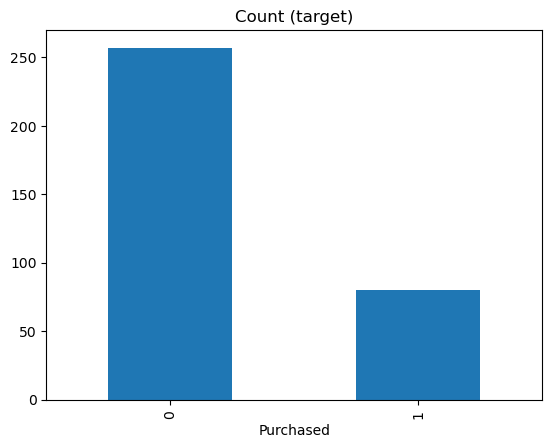

In [49]:
# Visualizing the number of instances in the target (class) attributes
SNA['Purchased'].value_counts().plot(kind='bar', title='Count (target)');

In [50]:
# Display the correlation between different variables.
sns.heatmap(SNA.corr(), cmap="YlGnBu", annot = True)
plt.show()

ValueError: could not convert string to float: 'Male'

<u>Encoding the categorical data</u>

The <code>LabelEncoder</code> is used to convert any categorical data to numerical labels.

The <code>LabelEncoder</code> will be used to convert <u>Gender</u> to the following values <i>Female=0</i>, <i>Male=1</i>

In [ ]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
SNA['Gender'] = LE.fit_transform(SNA['Gender'])

In [ ]:
#To view the new dataset after encoding the categorical data
SNA.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
SNA['Gender'].value_counts()

Gender
0    169
1    168
Name: count, dtype: int64

<u>Define the predictor and target attribute</u>

We will use all the attributes as our Predictor attributes which we call <code>"x"</code> and Purchased is the target attribute which we call <code>"y"</code>.

<i>The following means select all the predictor attributes (x) except the target (class) attributes (y)  which is always represented as (-1). </i>

In [ ]:
x = SNA.iloc[:,:-1].values    # predictor attribute
y = SNA.iloc[:,-1].values        # target attribute

In [ ]:
x.shape

(337, 4)

<u>Train/Test the data </u>

The dataset will be split into a test set and a train set. A 75% dataset is split for training and the remaining 25% for tests.

<b>Note:</b> <code>random_state=0</code>


- If you don't mention the random_state in the code, then whenever you execute your code a new random value is generated and the train and test datasets would have different values each time.

- However, if you use a particular value for random_state(random_state = 0 or any other value) everytime the result will be same,i.e, same values in train and test datasets.

In [ ]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25, random_state=0)

<u>Handling class imbalance</u>

- In this step, the class imbalance will be handled by applying the SMOTE algorithm which will increase the minority class. 
- The SMOTE will be applied to the Training set only.

In [ ]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [ ]:
#To display the data labels before and after oversampling the following is used:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 62
Before OverSampling, counts of label '0': 190 

After OverSampling, counts of label '1': 190
After OverSampling, counts of label '0': 190


<u>Build the Machine learning Model</u>

DT Classifier will be imporetd using Scikit Learn Library.

In [74]:
# import the Decision tree classifier from scikit learn
from sklearn.tree import DecisionTreeClassifier

<u>Initialize the DT model</u>

In this step, DT model will be initialized. criterion =<code>entropy</code>, <code>random_state= 0</code> will be used.

In [69]:
#initialize the Decision tree model using Entropy (Information Gain)
DT=DecisionTreeClassifier(criterion ='entropy', splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5, random_state= 0)

<u>Fitting the DT Model</u>

In this step, the training data will be fitted into the model x_train, y_train is the training data.

In [70]:
#fit the DT Model
DT.fit(x_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10,
                       min_samples_leaf=5, random_state=0, splitter='random')

<u>Model Predicttion</u>

In [71]:
#result
y_pred=DT.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

<u>Confusion Matrix</u>

In this step, confusion metric will be used to display the result, to do that confusion matrix will be imported from sklearn.metrics then two parameters will be passed first is the <code> y_test </code> which is the actual test set result and second is <code>y_pred</code> which is the predicted result.

In [72]:
# print the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[63,  4],
       [ 4, 14]], dtype=int64)

<u>Accuracy Score</u>

In [73]:
# check the accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred)
ac*100

90.58823529411765

<u>Random Under Sampler</u>

Repeat the prvious steps using the <code>under-sampling methods</code>, and handle class imbalance will be handled by applying the random under-sample algorithm which will decrease the majority class. 

Similar to <code>SMOTE</code>, the dataset will be split into a test set and a train set. A 75% dataset split for training and the remaining 25% for testing, then random under sampler will be applied to the Training set only.


In [52]:
rus = RandomUnderSampler(random_state=42, replacement=True)
x_train_res, y_train_res = rus.fit_resample(x_train, y_train.ravel())

In [56]:
print(sum(y_train_res==1))
print(sum(y_train_res==0))

62
62


In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt = DecisionTreeClassifier(criterion='entropy', splitter='random', max_leaf_nodes=10, min_samples_leaf= 5, max_depth=5, random_state=0)

In [63]:
sum(y_train==0)

190

In [78]:
dt.fit(x_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10,
                       min_samples_leaf=5, random_state=0, splitter='random')

In [79]:
y_pred = dt.predict(x_test)

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[63,  4],
       [ 4, 14]], dtype=int64)